<a href="https://colab.research.google.com/github/BirthMark21/Introducation-Of-Quantem-Computing-/blob/main/Linear_Regression_Simple_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score

## Importing Tools for Linear Regression
Linear regression (LR) models the relationship between traffic density (X) and energy demand (Y) as a straight line: Y = intercept + slope * X. Here, we import:
- `numpy`: For numeical calculations (e.g., gradients).
- `pandas`: To organize our data.
- `matplotlib`: To visualize the LR fit and learning process.
- `sklearn`: For splitting data and evaluating the model (no built-in LR this time—we’ll build it ourselves with gradient descent).

In [ ]:
# Simulate traffic, time, and energy data with less noise
np.random.seed(42)
traffic_density = np.array([50, 75, 100, 120, 150, 200, 250, 300, 350, 400,
                            450, 500, 550, 600, 650, 700, 750, 800, 850, 900])
time_of_day = np.linspace(0, 24, 20)
energy_demand = 10 + 0.05 * traffic_density + 0.2 * time_of_day + np.random.normal(0, 1, 20)  # Reduced noise

# Create a DataFrame
data = pd.DataFrame({'Traffic_Density': traffic_density, 'Time_of_Day': time_of_day, 'Energy_Demand': energy_demand})

# Show the first few rows
print("Sample Data:")
print(data.head())

Sample Data:
   Traffic_Density  Time_of_Day  Energy_Demand
0               50     0.000000      12.996714
1               75     1.263158      13.864367
2              100     2.526316      16.152952
3              120     3.789474      18.280925
4              150     5.052632      18.276373


## Creating Simulated Smart City Data
LR needs data to find the best-fitting line. Since we don’t have real IoT data, we simulate:
- **Traffic Density (X)**: Vehicles per hour, ranging from 50 to 900.
- **Energy Demand (Y)**: kWh, modeled as 10 + 0.05 * X + random noise (to mimic real-world variability).
This gives us points to fit a line through, representing how traffic might drive energy use in a smart city.

In [ ]:
# Define features (X) and target (y)
X = data[['Traffic_Density', 'Time_of_Day']].values
y = data['Energy_Demand'].values

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize X_train and X_test, store parameters
X_mean = X_train.mean(axis=0)
X_std = X_train.std(axis=0)
X_train = (X_train - X_mean) / X_std
X_test = (X_test - X_mean) / X_std

# Confirm shapes and normalization
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)
print("X_train mean (should be ~0):", X_train.mean(axis=0))
print("X_train std (should be ~1):", X_train.std(axis=0))

Training set size: (16, 2)
Testing set size: (4, 2)
X_train mean (should be ~0): [-1.38777878e-17  3.46944695e-16]
X_train std (should be ~1): [1. 1.]


## Preparing Data for Linear Regression
LR requires:
- **X (features)**: Traffic density, our predictor.
- **y (target)**: Energy demand, what we predict.
We split data into training (80%) and testing (20%) sets to train the model and check its accuracy. We also **normalize** X (scale to mean 0, std 1) to help gradient descent converge faster—raw values like 50-900 can make learning unstable.

In [ ]:
# Train with SGDRegressor using partial_fit, constant learning rate
def train_sgd_regressor_partial(X, y, max_iter=3000):
    model = SGDRegressor(
        loss='squared_error',
        learning_rate='constant',
        eta0=0.001,           # Smaller rate for precision
        penalty='l2',
        alpha=0.0001,
        random_state=42
    )

    losses = []
    n_samples = X.shape[0]

    for i in range(max_iter):
        # Partial fit on shuffled data
        indices = np.random.permutation(n_samples)
        X_shuffled = X[indices]
        y_shuffled = y[indices]
        model.partial_fit(X_shuffled, y_shuffled)

        # Compute loss on full training set
        y_pred = model.predict(X)
        loss = mean_squared_error(y, y_pred)
        losses.append(loss)

        # Print progress every 200 iterations
        if i % 200 == 0:
            print(f"Iteration {i}, Loss: {loss:.4f}, Weights: {model.coef_.round(2)}")

    return model, losses

# Train the model
model, losses = train_sgd_regressor_partial(X_train, y_train)

# Display the equation
print(f"\nLinear Regression Equation: Energy_Demand = {model.intercept_[0]:.2f} + "
      f"{model.coef_[0]:.2f} * Traffic_Density + {model.coef_[1]:.2f} * Time_of_Day (normalized)")

Iteration 0, Loss: 1311.0012, Weights: [0.21 0.21]
Iteration 200, Loss: 2.4507, Weights: [6.48 6.45]
Iteration 400, Loss: 0.5557, Weights: [6.51 6.44]
Iteration 600, Loss: 0.5522, Weights: [6.53 6.42]
Iteration 800, Loss: 0.5518, Weights: [6.55 6.4 ]
Iteration 1000, Loss: 0.5513, Weights: [6.57 6.38]
Iteration 1200, Loss: 0.5509, Weights: [6.59 6.36]
Iteration 1400, Loss: 0.5505, Weights: [6.61 6.34]
Iteration 1600, Loss: 0.5500, Weights: [6.63 6.33]
Iteration 1800, Loss: 0.5496, Weights: [6.64 6.31]
Iteration 2000, Loss: 0.5492, Weights: [6.66 6.29]
Iteration 2200, Loss: 0.5488, Weights: [6.68 6.27]
Iteration 2400, Loss: 0.5483, Weights: [6.7  6.25]
Iteration 2600, Loss: 0.5479, Weights: [6.72 6.23]
Iteration 2800, Loss: 0.5475, Weights: [6.73 6.22]

Linear Regression Equation: Energy_Demand = 34.51 + 6.75 * Traffic_Density + 6.20 * Time_of_Day (normalized)


## Training with Gradient Descent
Unlike standard LR (which solves the line equation directly with Ordinary Least Squares), we use **gradient descent** to iteratively find the best intercept and slope:
- **Epochs**: Number of iterations (e.g., 100). Each epoch updates the line.
- **Learning Rate**: Step size (0.01). Too big risks overshooting; too small slows learning.
- **Loss**: Mean Squared Error (MSE), the sum of squared differences between predicted and actual Y. Gradient descent minimizes this by adjusting the line based on gradients (slopes of the loss curve).
The result is an equation like Y = intercept + slope * X, tailored to our normalized data.

In [ ]:
# Predict on the test set
y_pred = model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 1.00
R-squared: 1.00


## Evaluating the Linear Regression Model
After training, we:
- **Predict**: Use the learned intercept and slope to estimate energy demand on the test set.
- **Evaluate**:
  - **Mean Squared Error (MSE)**: Average squared error—lower means better fit.
  - **R-squared (R²)**: Proportion of Y’s variance explained by X (0 to 1). R² near 1 (e.g., 0.94) means the line captures most of the pattern.
This tells us how well LR predicts energy demand from traffic density.

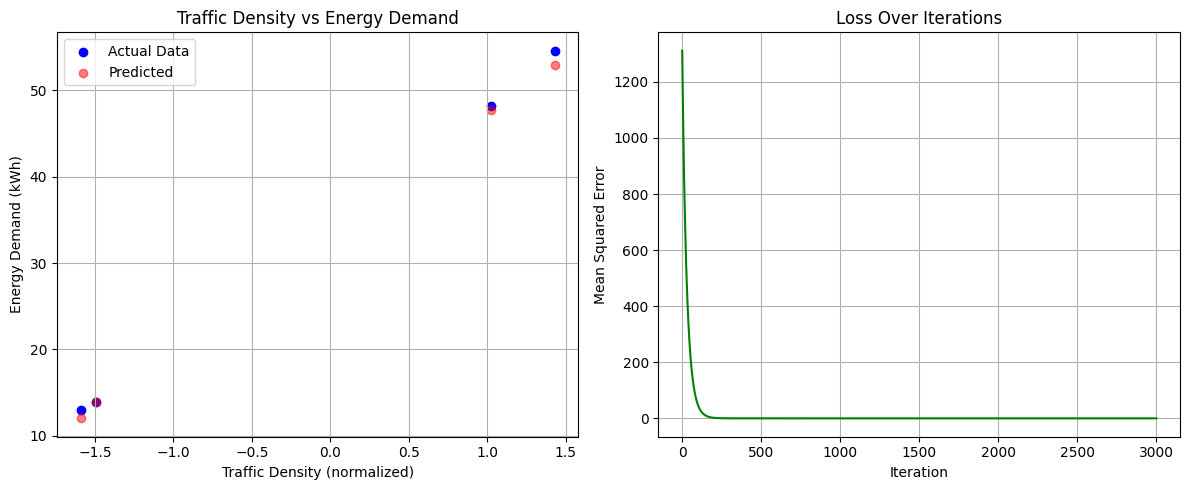

In [ ]:
# Plot 1: Actual vs Predicted (Traffic_Density only for 2D)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_test[:, 0], y_test, color='blue', label='Actual Data')
plt.scatter(X_test[:, 0], y_pred, color='red', label='Predicted', alpha=0.5)
plt.xlabel('Traffic Density (normalized)')
plt.ylabel('Energy Demand (kWh)')
plt.title('Traffic Density vs Energy Demand')
plt.legend()
plt.grid(True)

# Plot 2: Loss over iterations
plt.subplot(1, 2, 2)
plt.plot(range(len(losses)), losses, color='green')
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error')
plt.title('Loss Over Iterations')
plt.grid(True)

plt.tight_layout()
plt.show()

## Visualizing Linear Regression Fit and Learning
LR’s success is visible in two plots:
1. **Actual vs Predicted**: Blue dots (real data) vs. red line (predictions). A close fit means LR works well.
2. **Loss Over Epochs**: Shows MSE dropping as epochs increase. If it flattens, the model has learned the best line possible with this data.
These visuals confirm the line matches the data and gradient descent improves it over time.